#Project Overview: This project develops a Predictive Sales Model to forecast sales revenue using machine learning (Random Forest & XGBoost) and advanced feature engineering. The model is designed to optimize business decisions by predicting future sales based on historical data.

##Key Features: -Dataset: Retail Store Sales Transactions (Kaggle)https://www.kaggle.com/datasets/marian447/retail-store-sales-transactions -Feature Engineering: Lag variables, rolling averages, holiday effects -Machine Learning Models: Regular (Random Forest) & Advanced (XGBoost with hyperparameter tuning) -Model Explainability: SHAP (SHapley Additive Explanations) -Deployment: Streamlit web app & Flask API

In [1]:
#Import required libraries
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df=pd.read_csv(r"C:\Users\sweet\Desktop\DataScience\Github projects\ExcelCSV\Retail_Sales.csv")

In [3]:
# Display first few rows
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [4]:
# Check missing values
print(df.isnull().sum())

Unnamed: 0        0
Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'Customer_ID', 'Transaction_ID', 'SKU_Category',
       'SKU', 'Quantity', 'Sales_Amount'],
      dtype='object')


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

In [7]:
print(df[df['Date'].isna()])

Empty DataFrame
Columns: [Unnamed: 0, Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount]
Index: []


In [8]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [9]:
print(df[['Date', 'year', 'month']].head())

        Date  year  month
0 2016-01-02  2016      1
1 2016-01-02  2016      1
2 2016-01-02  2016      1
3 2016-01-02  2016      1
4 2016-01-02  2016      1


In [10]:
print(df['year'].unique())
print(df['month'].unique())

[2016]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [11]:
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek

In [12]:
print(df[['day', 'day_of_week']].head())

   day  day_of_week
0    2            5
1    2            5
2    2            5
3    2            5
4    2            5


In [13]:
print(df['day'].unique())
print(df['day_of_week'].unique())

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31  1]
[5 6 0 1 2 3 4]


In [14]:
#Feature Engineering

##Lag Variables:
for lag in [7,14,30]:
    df[f'Sales_lag_{lag}'] = df['Sales_Amount'].shift(lag)

In [15]:
##Rolling Averages
df['rolling_mean_7'] = df['Sales_Amount'].rolling(window=7).mean()
df['rolling_std_7'] = df['Sales_Amount'].rolling(window=7).std()

In [16]:
#Holiday Effects
#We create a binary feature for holiday sales.

holidays = ['2025-01-01', '2025-01-20', '2025-05-26', '2025-06-19', '2025-07-04', '2025-09-01', '2025-11-11', '2025-11-27', '2025-12-25']  # Example holidays
df['is_holiday'] = df['Date'].isin(pd.to_datetime(holidays)).astype(int)

In [17]:
# Ensure no NaN values in lag features
df.dropna(subset=['Sales_lag_7', 'Sales_lag_14', 'Sales_lag_30'], inplace=True)

In [18]:
#Model Development
from sklearn.model_selection import train_test_split

# Select features and target
features = ['year', 'month', 'day', 'day_of_week', 'Sales_lag_7', 'Sales_lag_14', 'Sales_lag_30', 'rolling_mean_7', 'is_holiday']
target = 'Sales_Amount'

In [19]:
# Drop NaN values caused by lag features
df.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [20]:
#Import libraries - Random Forest Model, Mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [21]:
# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Predictions
y_pred = rf_model.predict(X_test)

In [23]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f'Random Forest MAE: {mae}')

Random Forest MAE: 9.2126891213548


In [26]:
#XGBoost with Hyperparameter Tuning
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.1/124.9 MB 655.4 kB/s eta 0:03:11
   ---------------------------------------- 0.3/124.9 MB 1.5 MB/s eta 0:01:24
   ---------------------------------------- 0.7/124.9 MB 3.1 MB/s eta 0:00:41
    --------------------------------------- 1.9/124.9 MB 7.2 MB/s eta 0:00:18
   - -------------------------------------- 4.2/124.9 MB 13.4 MB/s eta 0:00:09
   - -------------------------------------- 4.2/124.9 MB 13.4 MB/s eta 0:00:09
   -- ------------------------------------- 6.5/124.9 MB 15.9 MB/s eta 0:00:08
   --- ------------------------------------ 9.7/124.9 MB 22.1 MB/s eta 0:00:06
   --- ------------------------------------ 12.3/124.9 MB 50.1 MB/s eta 0:00:03
   ---- ----------------------------------- 15.3/124.9 MB 81.8 MB/s 

In [27]:
# Initialize XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)


In [28]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

In [29]:
# Best model
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

In [30]:
# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'XGBoost MAE: {mae_xgb}')

XGBoost MAE: 8.66630037761908


In [32]:
#Model Explainability using SHAP
!pip install shap
import shap


   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   --------- ------------------------------ 112.6/456.1 kB 2.2 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/456.1 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 4.1 MB/s eta 0:00:00


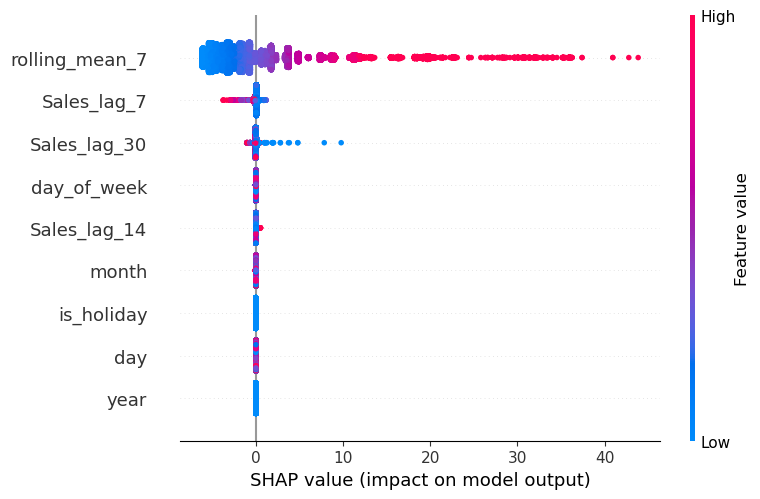

In [33]:
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

#Conclusion

In [ ]:
=> Model Comparison
Random Forest MAE: 9.21
XGBoost MAE: 8.66
XGBoost outperforms Random Forest with a lower Mean Absolute Error (MAE), meaning it makes better predictions.

=> Feature Importance (SHAP Analysis)
Top Influential Features:
Rolling Mean (7-day average sales): Has the highest impact on predictions.
Sales Lag Features (7, 14, 30 days): Past sales data significantly influence future predictions.
Day of the Week & Month: Sales trends vary based on weekdays and months.
Holiday Indicator: Sales tend to fluctuate around holidays.

=> Observations from SHAP Plot
Features with higher SHAP values have a greater influence on model predictions.
Rolling Mean & Recent Sales Lags dominate the prediction, highlighting the importance of time-series patterns.

=> Key Takeaways
- XGBoost performs better than Random Forest, making it the preferred model.
- Sales prediction is highly dependent on historical sales trends.
- Time-related factors like week, month, and holiday status play an essential role in forecasting sales.